# Цель данной задачи 
Реализовать многослойный перцептрон для классификации рукописных цифр. Используя набор данных MNIST, состоящий из черно-белых изображений размером 28x28, необходимо обучить модель распознавать цифры от 0 до 9.

# Описание исходных данных:

Набор данных MNIST содержит следующие компоненты:

Обучающая выборка: Состоит из 60 000 черно-белых изображений размером 28x28 пикселей. Каждое изображение содержит рукописную цифру от 0 до 9.

Тестовая выборка: Содержит 10 000 черно-белых изображений размером 28x28 пикселей, аналогичных изображениям из обучающей выборки.Новый раздел

## Ссылка на набор данных MNIST:
https://keras.io/datasets/#mnist-database-of-handwritten-digits

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 [==============================] - 0s 0us/step


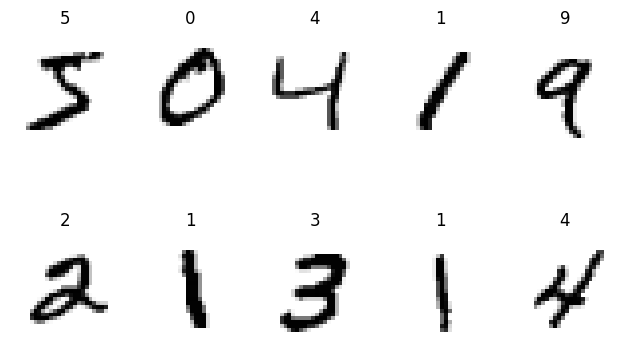

In [2]:
for i in range(10):
    plt.subplot(2, 5, i+1)  # Создание сетки 2x5, выбор текущего подграфика
    plt.imshow(x_train[i], cmap='binary', interpolation='nearest')
    plt.axis('off')  # Отключение осей координат
    plt.title(y_train[i])  # Заголовок - метка класса
plt.tight_layout()  # Автоматическое размещение подграфиков
plt.show()

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Список литературы
1. Набор данных классификации цифр MNIST https://keras.io/api/datasets/mnist/
2. Лабораторная работа №6. https://lms.uni-dubna.ru/pluginfile.php/270810/mod_assign/introattachment/0/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%206.pdf?forcedownload=1
3. Официальная документация Keras (https://keras.io/) - документация библиотеки Keras, где вы найдете подробную информацию о различных слоях, функциях активации, оптимизаторах и других компонентах нейронных сетей.
4. Официальная документация TensorFlow (https://www.tensorflow.org/) - документация библиотеки TensorFlow, на которой базируется Keras. Здесь вы найдете информацию о различных инструментах и возможностях TensorFlow для глубокого обучения.

In [4]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(784,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [6]:
# Получение общей информации о модели
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


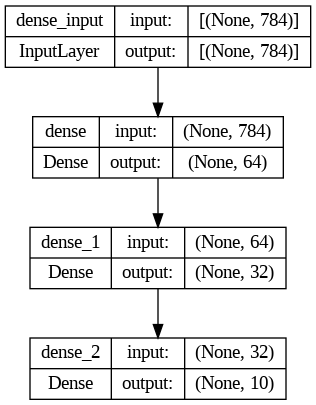

In [7]:
# Визуализация структуры модели
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

В приведенном примере используется категориальная кросс-энтропия в качестве функции потерь (loss). 

В качестве оптимизатора (optimizer) указан adam, который является распространенным оптимизатором для глубокого обучения. 

В качестве метрики (metrics) указана точность (accuracy), которая будет использоваться для оценки производительности модели. 

In [9]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

temp = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2905 - accuracy: 0.9169 - val_loss: 0.1551 - val_accuracy: 0.9562
Epoch 2/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1334 - accuracy: 0.9607 - val_loss: 0.1198 - val_accuracy: 0.9635
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0987 - accuracy: 0.9699 - val_loss: 0.1179 - val_accuracy: 0.9644
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0800 - accuracy: 0.9754 - val_loss: 0.1035 - val_accuracy: 0.9689
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0662 - accuracy: 0.9793 - val_loss: 0.1100 - val_accuracy: 0.9655
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0566 - accuracy: 0.9821 - val_loss: 0.0951 - val_accuracy: 0.9714
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0483 - accuracy: 0.9842 - val_loss: 0.1075 - val_

In [11]:
from PIL import Image

images = []

for i in range(10):
    image_path = f"28 28 {i}.png"
    image = Image.open(image_path)

    image = image.convert("L")

    image_array = np.array(image)
    images.append(image_array)

images = np.array(images)

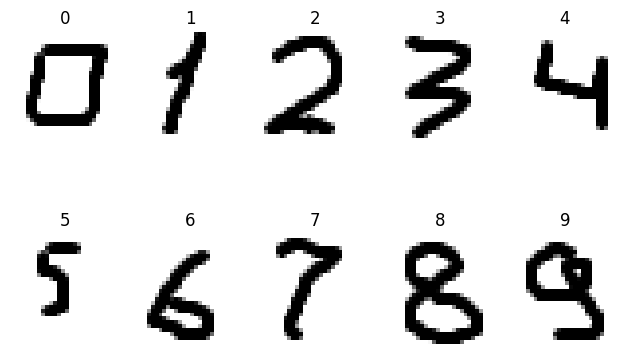

In [12]:
import numpy as np

x_new_data = np.reshape(images, (images.shape[0], 28, 28, 1))
x_new_data = np.invert(x_new_data)
y_new_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(10):
    plt.subplot(2, 5, i+1)  # Создание сетки 2x5, выбор текущего подграфика
    plt.imshow(x_new_data[i], cmap='binary', interpolation='nearest')
    plt.axis('off')  # Отключение осей координат
    plt.title(y_new_data[i])  # Заголовок - метка класса
plt.tight_layout()  # Автоматическое размещение подграфиков
plt.show()

x_new_data = x_new_data / 255.0

x_new_data = x_new_data.reshape(-1, 784)
y_new_data_ = to_categorical(y_new_data)

In [13]:
# Оценка производительности модели на новых данных
loss, accuracy = model.evaluate(x_new_data, y_new_data_)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Прогнозирование классов для новых данных
predictions = model.predict(x_new_data)
predicted_classes = np.argmax(predictions, axis=1)

# Вывод предсказанных классов
for i in range(len(x_new_data)):
    print(f"Image {i+1} original class: {y_new_data[i]}, predicted class: {predicted_classes[i]}")

1/1 [==============================] - 0s 37ms/step - loss: 42.7565 - accuracy: 0.5000
Loss: 42.7564811706543
Accuracy: 0.5
1/1 [==============================] - 0s 148ms/step
Image 1 original class: 0, predicted class: 0
Image 2 original class: 1, predicted class: 1
Image 3 original class: 2, predicted class: 2
Image 4 original class: 3, predicted class: 3
Image 5 original class: 4, predicted class: 4
Image 6 original class: 5, predicted class: 6
Image 7 original class: 6, predicted class: 5
Image 8 original class: 7, predicted class: 2
Image 9 original class: 8, predicted class: 7
Image 10 original class: 9, predicted class: 3


Таким образом мы видим, что: проведя эксперимент на разных количестве эпох обучения, модель определяет по разному - при 25 и 100 эпохах - точность возрастает более чем в 5 раз, почти все результаты верны.

Чем дольше мы будем проводить обучение, чем точнее результат, а также чем ровнее и лучше отрисуем цифру - результат будет лучше.

# Список литературы
1. Лабораторная работа №6. https://lms.uni-dubna.ru/pluginfile.php/270810/mod_assign/introattachment/0/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%206.pdf?forcedownload=1

2. Официальная документация Keras (https://keras.io/) - документация библиотеки Keras, где вы найдете подробную информацию о различных слоях, функциях активации, оптимизаторах и других компонентах нейронных сетей.

3. Официальная документация TensorFlow (https://www.tensorflow.org/) - документация библиотеки TensorFlow, на которой базируется Keras. Здесь вы найдете информацию о различных инструментах и возможностях TensorFlow для глубокого обучения.

4. Статьи на сайте Medium: https://medium.com/